# Tarea Final ML (Loan Prediction Based on Customer Behavior)

- Estudiante: Raúl Ignacio Reyes Santana
- RUT: 19.075.071-k

## Contexto:

En 2020, América Latina y el Caribe se enfrentó a la peor crisis de la que se tenga constancia y a la mayor contracción económica del mundo en desarrollo (el PIB y la inversión se redujeron un 7,7% y un 20%, respectivamente). Los datos disponibles también muestran que la caída de la inversión respecto de la del PIB fue mayor en América Latina y el Caribe que en otras regiones en desarrollo. La pandemia de enfermedad por coronavirus (COVID-19) ha profundizado las brechas estructurales e institucionales de América Latina y el Caribe. La crisis ha afectado gravemente las estructuras productivas y el mercado laboral: más de 2,7 millones de empresas han cerrado y el número de personas desempleadas ha aumentado hasta situarse en 44,1 millones. La cantidad considerable de empresas que han cerrado y de empleos que se han perdido, sumada al hecho de que los segmentos más vulnerables de la población se han llevado la peor parte de la crisis, ha llevado a que el número de personas en situación de pobreza pasara de 185,5 a 209 millones (del 30,3% al 33,7% de la población total).

Los efectos de la pandemia y las políticas aplicadas a modo de respuesta han aumentado las necesidades de liquidez de los países de la región para afrontar la fase de emergencia. **Al mismo tiempo, estos factores han llevado a que se elevara el nivel de endeudamiento (América Latina y el Caribe es la región más endeudada del mundo en desarrollo), y eso puede poner en peligro la recuperación y la capacidad de los países para construir un futuro mejor.**



Fuente: https://www.cepal.org/sites/default/files/publication/files/46710/S2100064_es.pdf

## Problema

Producto del contexto en el cual vivimos de pandemia mundial y crisis financiera que afecta a gran cantidad de países en América Latina, las entidades financieras como los bancos se han vuelto mucho más reticentes al ofrecer productos financieros como ejemplo creditos de consumo, realizando una exhaustiva evaluación de los clientes antes de entregar estos creditos, donde queda a criterio de exclusivamente seres humanos decidir si otorgar o no el credito a una persona basado en sus ingresos, edad, profesión, entre otros datos relevantes. En resumen la problemática tiene dos aristas la primera de que es posible que los seres humanos se equivoquen al evaluar a una persona que realmente necesita el dinero y que no se convertirá en morosa y por otro lado es el tiempo excesivo que utilizan los seres humanos en el proceso de evaluación.


## Hipótesis:
A través de un modelo de Machine Learning es posible predecir si una persona se convertirá en morosa o no al adquirir un credito de consumo en una entidad financiera.

## Dataset

Nombre: **Loan Prediction Based on Customer Behavior**

Una organización quiere predecir quiénes son los posibles morosos del producto de creditos de consumo. Disponen de datos sobre el comportamiento histórico de los clientes basados en lo que han observado.


Fuente: https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior


In [1]:
#Importamos las librerias que utilizaremos

import pandas as pd
import numpy as np
import sklearn.model_selection # Validación cruzada
import sklearn.linear_model
import sklearn.neural_network # Perceptrón multicapa
import sklearn.svm
import sklearn.dummy
import sklearn.linear_model
import scipy.stats # Prueba estadística
import matplotlib.pyplot as plt
import sklearn.preprocessing # Módulo donde están las  herramientas para el escalamiento de las variables
import sklearn.neighbors # Utilizaremos un regresor basado en KNN
import sklearn.tree # Métodos basados en árboles
import seaborn as sns # Biblioteca de visualización programada sobre matplotlib
import imblearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#Cargamos la data de entrenamiento al modelo
loan_prediction= pd.read_csv("/Users/raulignacioreyessantana/loan-prediction-based-on-customer-behavior/Training Data.csv")

In [3]:
#Revisamos las columnas de la data
loan_prediction.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Preprocesamiento de Datos

In [4]:
#Eliminamos la columna ID que no aporta información alguna al modelo
loan_prediction.drop ('Id', axis = 1, inplace = True )
#Verificamos que se elimino
loan_prediction.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


**Nos podemos dar cuenta que en nuestro dataset existen clases de distintos tipos de datos, como por ejemplo 
numeros (int64) y object (String)**

In [5]:
#Información del dataset
loan_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [6]:
loan_prediction.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


**También nos podemos dar cuenta que nuestros datos presentan diferentes rangos o escalas, por lo cual sera necesario normalizarlos para obtener un modelo de ML más preciso**

In [7]:
loan_prediction['Risk_Flag']=loan_prediction['Risk_Flag'].astype('category')

**Graficamos nuestros datos de entrenamiento donde mostramos los clientes morosos vs los no morosos para ver como esta balanceada o no el dataset**

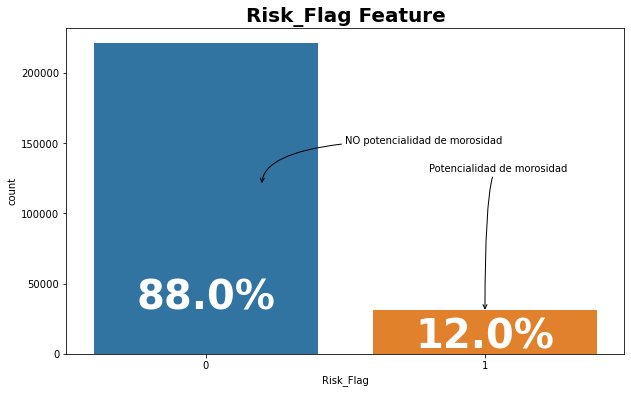

In [8]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=loan_prediction, x='Risk_Flag')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(loan_prediction)*100,0)}%", ha='center', size=40, weight='bold', rotation=360, color='white')
plt.title("Risk_Flag Feature", size=20, weight='bold')
plt.annotate(text="NO potencialidad de morosidad", xytext=(0.5,150000),xy=(0.2,120000), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Potencialidad de morosidad", xytext=(0.8,130000),xy=(1,30000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.show()

**En el grafico anterior nos podemos dar cuenta que también existe un desbalance de clase importante en cuanto a la etiqueta de Riesgo, donde las personas que NO son potenciales a no pagar un préstamo representan el 88% del dataset, mientras que las personas que son potenciales a no pagar un prestamos son solo un 12% del dataset. En consecuencia se deberá aplicar alguna técnica de balanceo de clases.**

----------------------------------------------------------------------------------------------------------------------
**Otro problema encontrado en el dataset, es que presenta clases no numéricas binarias y no binarias, por ende utilizaremos la librería de sklearn.preprocessing donde utilizaremos:**

LabelEncoder -> para transformar etiquetas no numéricas binarias en etiquetas numéricas (Married/Single y Car_Ownership)

One Hot Encoding -> para codificar características categóricas como una matriz numérica (House_Ownership, CITY, STATE, Profession)

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [9]:
#Utilizamos LabelEncoder para las clases binarias
from sklearn.preprocessing import LabelEncoder

binary_class = ['Married/Single', 'Car_Ownership']
for column in binary_class:
    print ( '\nBefore:', loan_prediction [column].unique () )
    lab_enc = LabelEncoder()
    loan_prediction [column] = lab_enc.fit_transform ( loan_prediction [column].values )
    print ('')
    print ( 'After:\n', loan_prediction [column] )
    print ( '*' * 50 )

# rename column Single
loan_prediction.rename(columns = { 'Married/Single' : 'Single' }, inplace = True)
loan_prediction['Single']=loan_prediction['Single'].astype('category')
loan_prediction['Car_Ownership']=loan_prediction['Car_Ownership'].astype('category')



Before: ['single' 'married']

After:
 0         1
1         1
2         0
3         1
4         1
         ..
251995    1
251996    1
251997    1
251998    1
251999    1
Name: Married/Single, Length: 252000, dtype: int64
**************************************************

Before: ['no' 'yes']

After:
 0         0
1         0
2         0
3         1
4         0
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Car_Ownership, Length: 252000, dtype: int64
**************************************************


In [10]:
# Aplicamos One Hot Encoding a las clases restantes del dataset
one_hot_class = ['House_Ownership', 'CITY', 'STATE', 'Profession']
for column in one_hot_class:
    one_hot = pd.get_dummies ( loan_prediction [column] ,
                drop_first = True)
    loan_prediction = pd.concat([loan_prediction, one_hot], axis=1)
    loan_prediction.drop (column, axis = 1, inplace = True )

In [11]:
#Revisamos que se aplicaron correctamente LabelEncoding como One Hot Encoding
loan_prediction.head()

,Income,Age,Experience,Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,owned,rented,...,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
0,1303834,23,3,1,0,3,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,1,0,9,13,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,0,0,4,10,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,1,1,2,12,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,1,0,3,14,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print ( loan_prediction.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Columns: 404 entries, Income to Web_designer
dtypes: category(3), int64(5), uint8(396)
memory usage: 105.5 MB
None


**Para poder evaluar los desempeños de nuestros modelos de la manera más válida posible, se suele dividir nuestro conjunto de datos un en subconjunto de entrenamiento y uno de prueba. El subconjunto de entrenamiento es el único que utilizaremos para entrenar nuestro modelo. El subconjunto de prueba es independiente al de entrenamiento y con este evaluamos las métricas de desempeño de nuestro modelo.**

Para fácilmente realizar esta separación utilizamos la **función sklearn.model_selection.train_test_split()**

In [13]:
from sklearn.model_selection import train_test_split
features, label = loan_prediction.drop ('Risk_Flag', axis=1).values , loan_prediction.Risk_Flag.values
features_train, features_test, label_train, label_test = train_test_split (features, 
                                                                     label,
                                                                     test_size = 0.3,
                                                                     random_state = 1,
                                                                     stratify = label)

## Balanceo de clases utilizando Synthetic Minority Oversampling Technique

El sobremuestreo al azar no agrega información nueva al conjunto de datos. La técnica que exploraremos ahora sintetiza nuevos datos desde las observaciones con las que cuenta el conjunto de datos.

SMOTE crea nuevas observaciones al trazar lineas entre observaciones de la clase minoritaria y agrega al azar una observación sobre esa línea.

In [14]:
from imblearn.over_sampling import SMOTE

print ('Número de observaciones en la variable objetivo antes del sobremuestreo de la clase minoritaria:', np.bincount (label_train) )

smt = SMOTE ()
features_train, label_train = smt.fit_resample (features_train, label_train)

print ('\nNúmero de observaciones en la variable objetivo tras el sobremuestreo de la clase minoritaria:', np.bincount (label_train) )

Número de observaciones en la variable objetivo antes del sobremuestreo de la clase minoritaria: [154703  21697]

Número de observaciones en la variable objetivo tras el sobremuestreo de la clase minoritaria: [154703 154703]


## Escalamiento utilizando Estandarización (StandardScaler)

En este tipo de escalamiento se retorna un grupo de variables mapeadas hacia una distribución normal de media 0 y desviación estandar 1.

In [15]:
#Aplicamos la Estandarización StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
features_train_std = std_scaler.fit_transform (features_train)
features_test_std = std_scaler.transform (features_test)

In [16]:
import pandas as pd
# Create the dataframe
df = pd.DataFrame(features_train_std)

In [17]:
#Verificamos que los datos fueron estandarizados con StandardScaler
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,402
count,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,...,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05,3.094060e+05
mean,6.068791e-17,5.397140e-15,6.976749e-15,-1.385128e-14,1.602974e-13,6.679447e-15,5.813219e-14,3.544393e-15,4.074136e-15,-5.567353e-15,...,7.471805e-15,-3.861742e-14,-6.578400e-15,-3.390369e-14,2.953061e-14,-3.142819e-16,-9.991142e-15,2.374772e-14,1.696099e-14,2.529124e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.720931e+00,-1.679618e+00,-1.653146e+00,-2.925780e+00,-6.045463e-01,-1.709388e+00,-1.412175e+00,-2.065411e-01,-3.374851e+00,-5.912932e-02,...,-1.361128e-01,-1.395821e-01,-1.422893e-01,-1.436429e-01,-1.291612e-01,-1.378027e-01,-1.410549e-01,-1.322056e-01,-1.209361e-01,-1.378027e-01
25%,-8.741329e-01,-8.526515e-01,-8.106158e-01,3.417892e-01,-6.045463e-01,-8.856559e-01,-6.864918e-01,-2.065411e-01,2.963094e-01,-5.912932e-02,...,-1.361128e-01,-1.395821e-01,-1.422893e-01,-1.436429e-01,-1.291612e-01,-1.378027e-01,-1.410549e-01,-1.322056e-01,-1.209361e-01,-1.378027e-01
50%,1.971485e-03,-2.568499e-02,3.191422e-02,3.417892e-01,-6.045463e-01,-6.192339e-02,3.919178e-02,-2.065411e-01,2.963094e-01,-5.912932e-02,...,-1.361128e-01,-1.395821e-01,-1.422893e-01,-1.436429e-01,-1.291612e-01,-1.378027e-01,-1.410549e-01,-1.322056e-01,-1.209361e-01,-1.378027e-01
75%,8.718055e-01,8.603505e-01,8.744442e-01,3.417892e-01,1.654133e+00,7.618091e-01,7.648754e-01,-2.065411e-01,2.963094e-01,-5.912932e-02,...,-1.361128e-01,-1.395821e-01,-1.422893e-01,-1.436429e-01,-1.291612e-01,-1.378027e-01,-1.410549e-01,-1.322056e-01,-1.209361e-01,-1.378027e-01
max,1.731471e+00,1.746386e+00,1.716974e+00,3.417892e-01,1.654133e+00,2.134697e+00,1.490559e+00,4.841651e+00,2.963094e-01,1.691208e+01,...,7.346849e+00,7.164245e+00,7.027934e+00,6.961709e+00,7.742266e+00,7.256750e+00,7.089436e+00,7.563976e+00,8.268830e+00,7.256750e+00


## Machine Learning (Algoritmos Supervisados)

Ahora es momento de utilizar algoritmos de ML supervisados sobre nuestro dataset de loan prediction.

**K-Nearest-Neighbor**

In [18]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(features_train_std, label_train)
knn_predicted = knn.predict(features_test_std)

**Rendimiento del algoritmo de K-Nearest-Neighbor aplicado a nuestro dataset**

In [19]:
print(sklearn.metrics.classification_report(label_test,knn_predicted))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     66301
           1       0.52      0.79      0.63      9299

    accuracy                           0.88     75600
   macro avg       0.74      0.84      0.78     75600
weighted avg       0.91      0.88      0.89     75600



**Decision-Tree-Classifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier ( random_state = 1 )
tree.fit ( features_train_std, label_train )
y_pred = tree.predict ( features_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( label_test, y_pred ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( label_test, y_pred ) )

Accuracy score: 0.87
Roc_Auc score: 0.85


**Rendimiento del algoritmo de Decision Tree Classifier aplicado a nuestro dataset**

In [21]:
print(sklearn.metrics.classification_report(label_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     66301
           1       0.49      0.83      0.62      9299

    accuracy                           0.87     75600
   macro avg       0.73      0.85      0.77     75600
weighted avg       0.91      0.87      0.89     75600



**Random-Forest**

In [22]:
random_forest = sklearn.ensemble.RandomForestClassifier(random_state = 11) # Instanciamos Random Forest.
random_forest.fit( # Ajustamos nuestro modelo.
    features_train_std,
    label_train
)

RandomForestClassifier(random_state=11)

In [23]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

RandomForestClassifier(random_state=11)

**Rendimiento del algoritmo de Random Forest aplicado a nuestro dataset**

In [24]:
print(sklearn.metrics.classification_report(label_test,random_forest.predict(features_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66301
           1       0.54      0.78      0.64      9299

    accuracy                           0.89     75600
   macro avg       0.76      0.84      0.79     75600
weighted avg       0.91      0.89      0.90     75600



## Optimización de Hiperparámetros (GRIDSEARCH)

La optimización de hiperparámetros es la selección de la combinación de hiperparámetros del modelo que maximiza la métrica que a nosotros nos intereza optimizar. Esta selección de hiperparámetros típicamente se realiza utilizando fuerza bruta al probar todas las combinaciones de hiperparámetros de un espacio determinado por nosotros.

Dentro de los 3 algoritmos de ML aplicados, el que presento un menor accuracy fue Decision Tree Classifier por tanto aplicaremos una tecnica de optimización de hiperparametros para mejorar su rendimiento y obtener mejores resultados.

In [25]:
#Utilizaremos GridSearchCV para poder encontrar los hiperparametros que maximiza el rendimiento del modelo de ML utilizando Decision-Tree-Classifier 
from sklearn.model_selection import GridSearchCV
# range of parameter values
split_range = [ 8, 10 ]
# parameters grid
grid_param = [
    { 'criterion' : [ 'entropy' ],
     'splitter' : [ 'best', 'random' ],
     'min_samples_split' : split_range }
]
gs = GridSearchCV ( estimator = tree,
                   param_grid = grid_param,
                   scoring = 'roc_auc',
                   cv = 3,
                   refit = True,
                   n_jobs = 4
                   )

gs = gs.fit ( features_train, label_train )

print ( 'Best hyperparameter:', gs.best_params_ )

print ( 'Best score: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

Best hyperparameter: {'criterion': 'entropy', 'min_samples_split': 10, 'splitter': 'random'}
Best score: 0.940


In [26]:
gs.fit ( features_train_std, label_train )
y_pred_gs = gs.predict ( features_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( label_test, y_pred_gs ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( label_test, y_pred_gs ) )

Accuracy score: 0.88
Roc_Auc score: 0.85


In [27]:
print(sklearn.metrics.classification_report(label_test,y_pred_gs))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66301
           1       0.51      0.81      0.63      9299

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



Finalmente al aplicar la tecnica de optimización, el algoritmo de Decision-Tree-Classifier paso de un accuracy del 87% a 88%, pero  aún asi no alcanzo el algoritmo de RandomForest con un accuracy del 89%.

## Matriz de Confusión

Realizamos la matriz de confusión para visualizar de mejor manera los resultados obtenidos en cada algoritmo de ML

**Matriz de KNN**

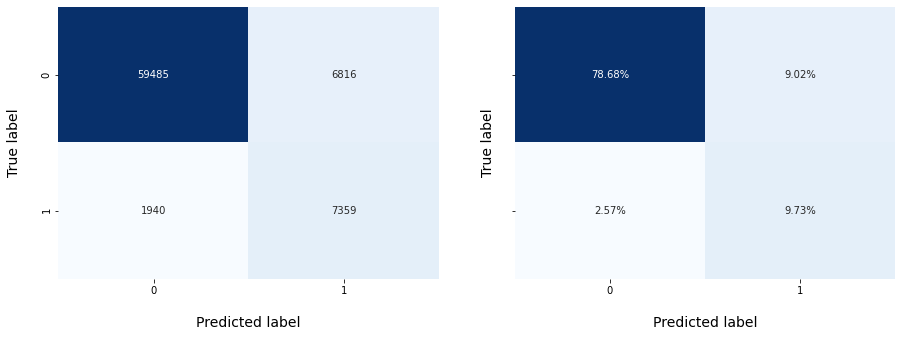

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  label_test, knn.predict(features_test_std))

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

**Matriz de Decision-Tree-Classifier**

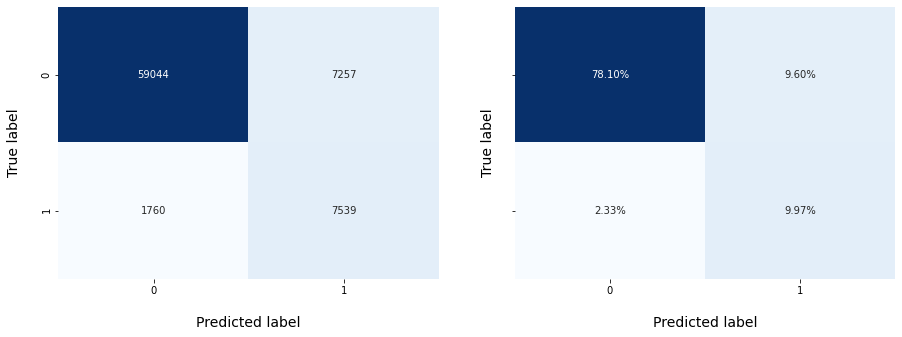

In [29]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (label_test, y_pred_gs)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

**Matriz de RandomForest**

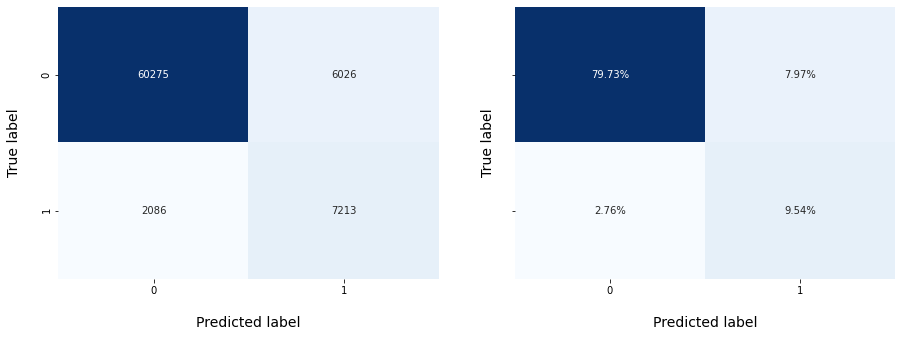

In [30]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  label_test, random_forest.predict(features_test_std))

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

## Machine Learning (Algoritmo No Supervisado)

## DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) es un algoritmo de clustering que no necesita ser inicializado con una cantidad de grupos específica. Este algortmo se basa en encontrar nubes densas de puntos para determinar los cluster.

Utilizaremos nuestro dataset de loan prediction cargado al notebook

In [31]:
loan_prediction.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,owned,rented,Agartala,Agra,Ahmedabad,...,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,...,252000.000000,252000.000000,252000.000000,252000.00000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.051262,0.920230,0.003210,0.004016,0.002575,...,0.018972,0.020083,0.020052,0.02304,0.018937,0.018706,0.020615,0.019302,0.018798,0.021417
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.220532,0.270937,0.056569,0.063244,0.050683,...,0.136427,0.140286,0.140177,0.15003,0.136301,0.135486,0.142092,0.137583,0.135810,0.144769
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Escalamos los datos pero ahora utilizando **MinMaxScaler()**

In [32]:
scaler = sklearn.preprocessing.MinMaxScaler()
loanP_scaled = pd.DataFrame(
    scaler.fit_transform(loan_prediction),
    columns = loan_prediction.columns
)

In [33]:
loanP_scaled.describe()

,Income,Age,Experience,Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,owned,rented,...,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,...,252000.000000,252000.000000,252000.000000,252000.00000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,0.301587,0.452420,0.499448,0.123000,0.051262,0.920230,...,0.018972,0.020083,0.020052,0.02304,0.018937,0.018706,0.020615,0.019302,0.018798,0.021417
std,0.288130,0.294204,0.300129,0.302774,0.458948,0.260504,0.349759,0.328438,0.220532,0.270937,...,0.136427,0.140286,0.140177,0.15003,0.136301,0.135486,0.142092,0.137583,0.135810,0.144769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,0.000000,0.214286,0.250000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,0.000000,0.428571,0.500000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,1.000000,0.642857,0.750000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ploteamos como se ven nuestros datos escalados, solo graficaremos con 3 clases ya que es necesario gran poder computacional para poder graficar todas las clases del dataset

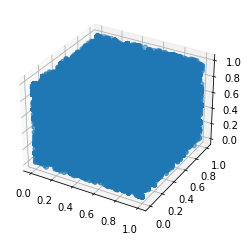

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    loanP_scaled.Age,
    loanP_scaled.Experience,
    loanP_scaled.Income
)
plt.show()

Instanciamos DBSCAN con sus hieperparámetros por defecto.

In [35]:
dbscan = sklearn.cluster.DBSCAN()

In [36]:
dbscan.fit(loanP_scaled)

DBSCAN()

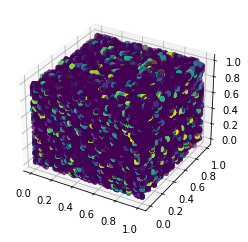

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    loanP_scaled.Age, # Vamos a graficar la edad del cliente en el eje x
    loanP_scaled.Experience, # EL ingreso anual en el eje y
    loanP_scaled.Income, # El puntaje de gasto en el eje z
    c = dbscan.labels_ # Pintamos cada uno de los clientes con el grupo asignado por k means
)
plt.show()

Al haber utilizado este algoritmo de ML no supervisado nos podemos dar cuenta que NO entrego buenos resultados como pudimos verlo visualmente en el grafio y ademas no es adecuado para nuestro dataset ya que este posee muchas clases y una gran cantidad de datos que requieren un gran poder computacional.

## CONCLUSIONES FINALES

- La Hipotesis que se planteo al iniciar este proyecto de que "A través de un modelo de Machine Learning es posible predecir si una persona se convertirá en morosa o no al adquirir un credito de consumo en una entidad financiera", fue probada. Los resultados que se obtuvieron al utilizar diferentes algoritmos de Machine Learning Supervisados principalmente como No Supervisados dan cuenta que es posible predecir si una persona se convertira en morosa o no posterior a recibir un credito de consumo con los datos necesarios como son los ingresos, la edad, la experiencia, la profesión, entre otros.

- Respecto a los algoritmos de Machine learning utilizados podemos decir:
    
    - De los 3 algoritmos de Machine Learning Supervisados utilizados se obtuvieron muy buenos rendimientos en todos los  casos, donde el mejor fue el de RandomForest con un accuracy del 89% y en consecuencia el elegido para este tipo de problemas.

    - Se aplico 1 solo algoritmo de Machine Learning no supervisado que no obtuvo muy buenos resultados al ser muy ineficiente con largos tiempos de procesamiento y donde se requeriria muchos poder computacional para ejecutarlo con todos los datos del dataset, por lo cual se decidio cursar solamente una iteración para ver como funcionaria con solo 3 clases.

- Finalmente podemos concluir de que  SI es posible contar con un modelo de Machine Learning que pueda predecir si una persona se convertira en morosa o no al adquirir un credito de consumo, teniendo una precisión muy alta del 89% y con tiempos de ejecución muy bajos, en la practica este modelo no vendria a remplazar a los seres humanos de una entidad financiera pero si podria ser una herramienta de ayuda para resolver la problematica planteada en el contexto de incertidumbre financiera que actualmente vive America Latina y el mundo.
